This code was based on in the following references:

[1] "Particle Swarm Optimization" published in 1995 by James Kennedy and Russell Eberhart

[2] "A New Optimizer Using Particle Swarm Theory" published in 1995 by James Kennedy and Russell Eberhart

[3] "A Novel Search Algorithm based on Fish School Behavior" published in 2008 by Bastos Filho, Lima Neto, Lins, D. O. Nascimento and P. Lima

[4] "An Enhanced Fish School Search Algorithm" published in 2013 by Bastos Filho and  D. O. Nascimento

[5] "Defining a Standard for Particle Swarm Optimization" published in 2007 by Bratton and Kennedy

### Imports

In [1]:
import os
import sys
import csv
import random
import copy
import math
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from random import randint
from IPython.display import display, HTML
from google.colab import drive, files
%matplotlib inline

### Connection with Google Drive

In [2]:
drive.mount('/content/drive', force_remount=True) #  Connect to drive
FOLDERNAME = 'POLI/decimo/tcc/Algoritms/Executions/' #  Set folder that have the datasts
assert FOLDERNAME is not None, "[!] Enter the foldername."
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME)) #  Locale the foldeer

%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/POLI/decimo/tcc/Algoritms/Executions


### Validation 30 bests execution of each algoritms

Get files CVSs that contains informations about many executions that have the bests values found by each algoritm. The algoritms are PSO, GWO and FSS and they has 30 execution with 1K iterations for the same objective functions with the same dimention.

In [3]:
optimizers = ["PSO", "FSS", "GWO", "VGWO"]
objective_functions = ["Sphere", "RotatedHyperEllipsoid", "Rosenbrock", "Dixon-Price", "Perm", "Quartic-Noise", "Generalized-Shwefel", "Rastrigin", "Ackley", "Griewank", "Levi", "Levi-13"]
dim = [15, 30, 50, 100]
results = []

filepath = os.path.dirname(os.path.abspath('Execution'))
for d in dim:
  for i, func in enumerate(objective_functions):
    for o in optimizers:
      iters = []
      filename = f"{filepath}/{d}d/{o}_{func}_cost_iter.txt"
      with open(filename) as f:
        lines = f.readlines()
      for l in lines:
        ite = l.strip().split()[:1000]
        obj = {'opt': o, 'func': func, 'dim': d, 'num_i': len(ite)}
        for i, v in enumerate(l.strip().split()):
          obj[f"run{i}"] = float(v)
        results.append(obj)

df_res = pd.DataFrame(results, index=range(len(results)), columns=['opt', 'func', 'dim', 'num_i']+[f"run{i}" for i in range(results[0]['num_i'])])
df_res

,opt,func,dim,num_i,run0,run1,run2,run3,run4,run5,...,run990,run991,run992,run993,run994,run995,run996,run997,run998,run999
0,PSO,Sphere,15,1000,2.531300e+04,1.275300e+04,1.275300e+04,1.275300e+04,1.275300e+04,1.128200e+04,...,3.585200e-32,3.585200e-32,3.585200e-32,2.927700e-32,2.927700e-32,2.927700e-32,2.927700e-32,1.993200e-32,1.993200e-32,1.993200e-32
1,PSO,Sphere,15,1000,2.048500e+04,1.531600e+04,1.531600e+04,1.531600e+04,1.422500e+04,8.380400e+03,...,2.540400e-34,2.184500e-34,2.184500e-34,2.184500e-34,2.184500e-34,1.964600e-34,1.964600e-34,1.964600e-34,1.878500e-34,1.878500e-34
2,PSO,Sphere,15,1000,3.110400e+04,1.771000e+04,1.771000e+04,1.771000e+04,1.172700e+04,7.393100e+03,...,4.687300e-33,4.618700e-33,4.529200e-33,4.455000e-33,4.311400e-33,4.212700e-33,4.212700e-33,4.006800e-33,4.006800e-33,4.006800e-33
3,PSO,Sphere,15,1000,3.125400e+04,1.633400e+04,1.556000e+04,1.556000e+04,8.955700e+03,7.226700e+03,...,3.888000e-32,3.805800e-32,3.805800e-32,3.280200e-32,3.280200e-32,3.280200e-32,2.867600e-32,2.867600e-32,2.867600e-32,2.733400e-32
4,PSO,Sphere,15,1000,2.945600e+04,1.515100e+04,7.924400e+03,7.924400e+03,7.924400e+03,7.924400e+03,...,2.671200e-33,2.671200e-33,2.671200e-33,2.415700e-33,2.415700e-33,2.415700e-33,2.415700e-33,2.415700e-33,2.415700e-33,2.415700e-33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,VGWO,Levi-13,100,1000,5.495700e+09,6.296100e+09,6.284700e+09,5.268800e+09,4.544400e+09,3.406600e+09,...,7.282000e+00,7.281600e+00,7.280900e+00,7.280200e+00,7.279600e+00,7.279200e+00,7.278200e+00,7.277900e+00,7.277500e+00,7.277400e+00
5756,VGWO,Levi-13,100,1000,5.149600e+09,5.309400e+09,5.126900e+09,4.896600e+09,3.455400e+09,2.944800e+09,...,7.477000e+00,7.476500e+00,7.475100e+00,7.474500e+00,7.474000e+00,7.473100e+00,7.472900e+00,7.472600e+00,7.472400e+00,7.472300e+00
5757,VGWO,Levi-13,100,1000,4.603700e+09,5.528300e+09,4.299600e+09,4.221600e+09,4.063800e+09,3.824400e+09,...,6.991200e+00,6.990000e+00,6.989400e+00,6.988500e+00,6.988100e+00,6.987800e+00,6.987200e+00,6.987100e+00,6.986700e+00,6.986500e+00
5758,VGWO,Levi-13,100,1000,4.246200e+09,4.272500e+09,4.214500e+09,4.206000e+09,2.477800e+09,2.225000e+09,...,6.902900e+00,6.902000e+00,6.901500e+00,6.900600e+00,6.899900e+00,6.899600e+00,6.899200e+00,6.898900e+00,6.898800e+00,6.898600e+00


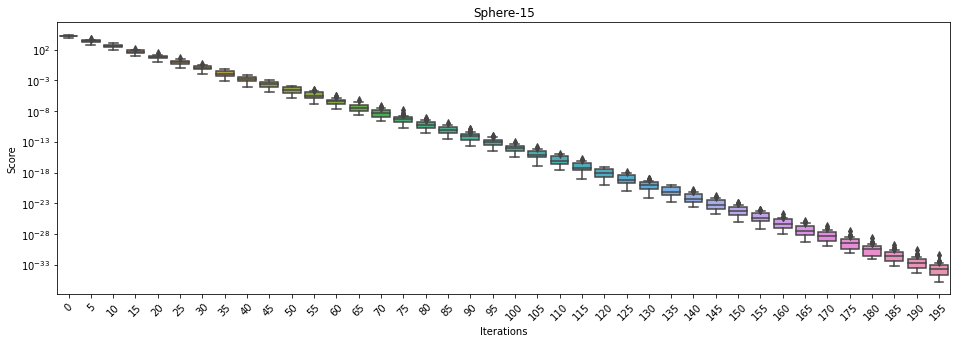

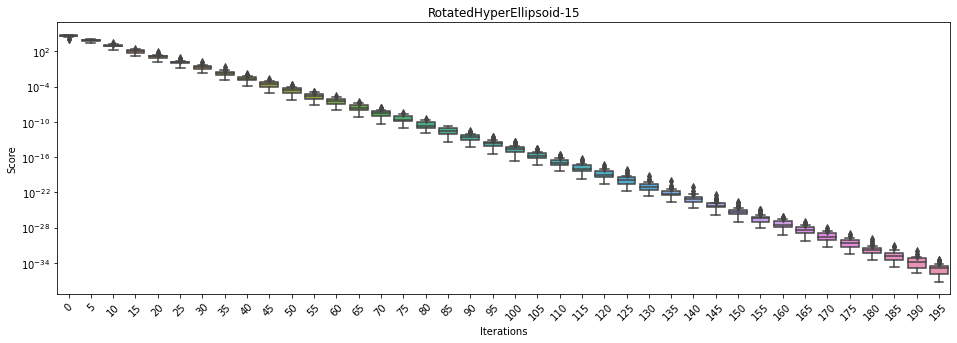

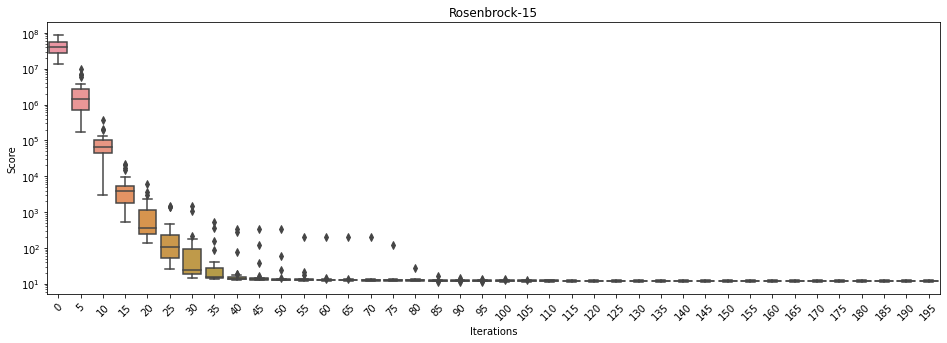

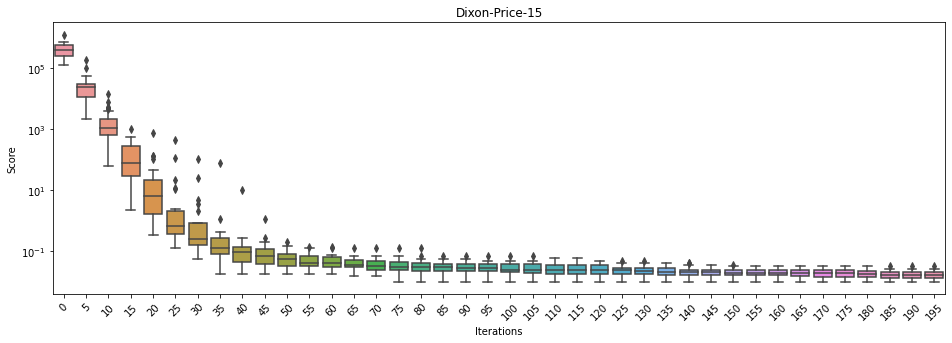

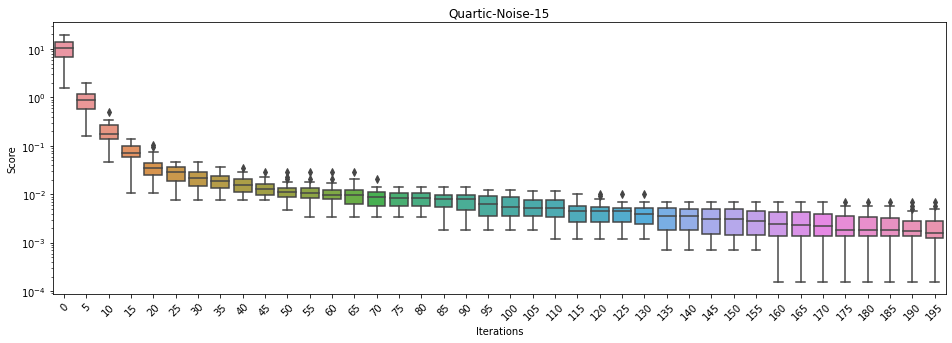

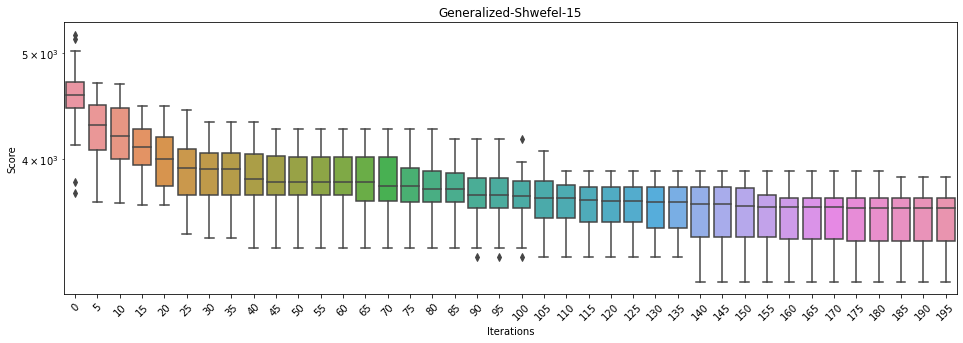

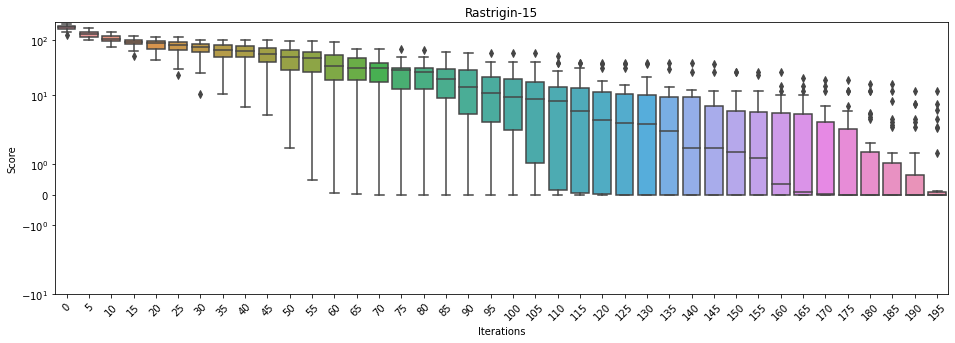

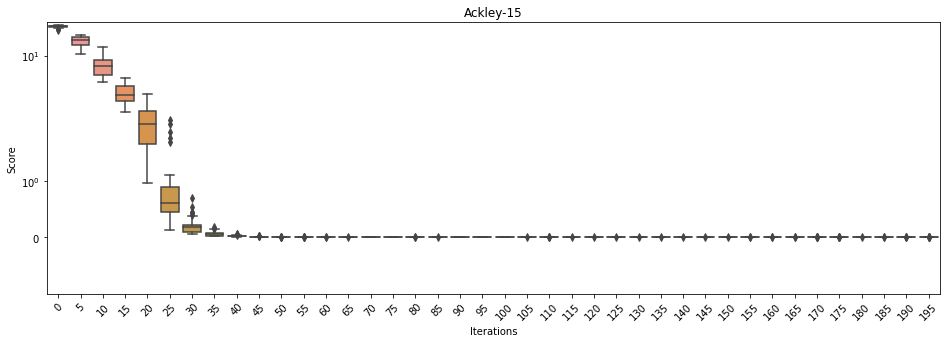

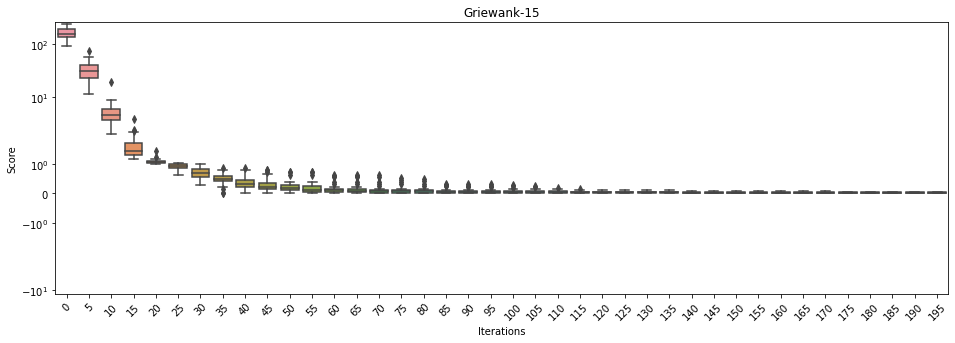

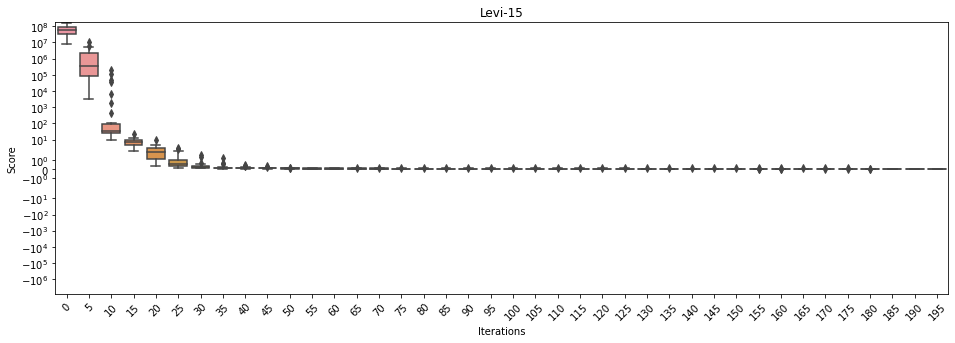

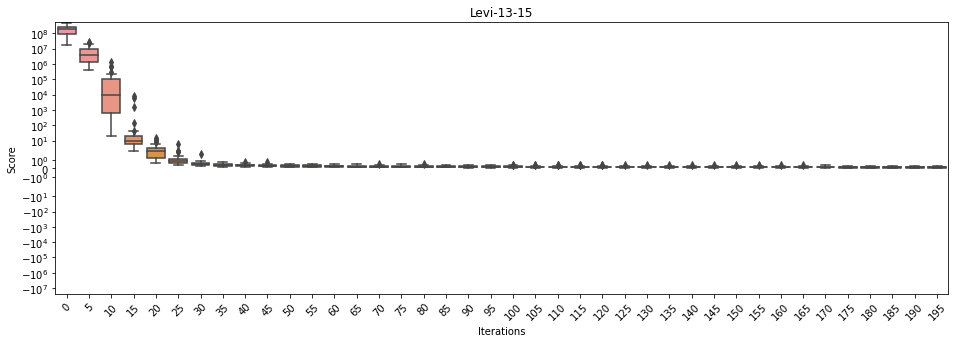

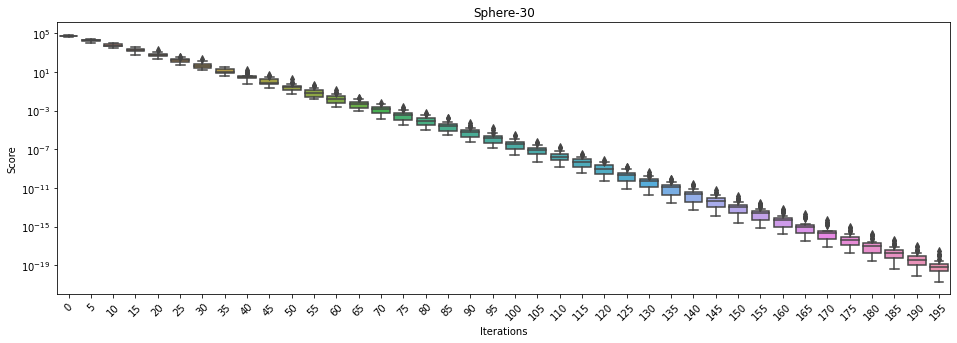

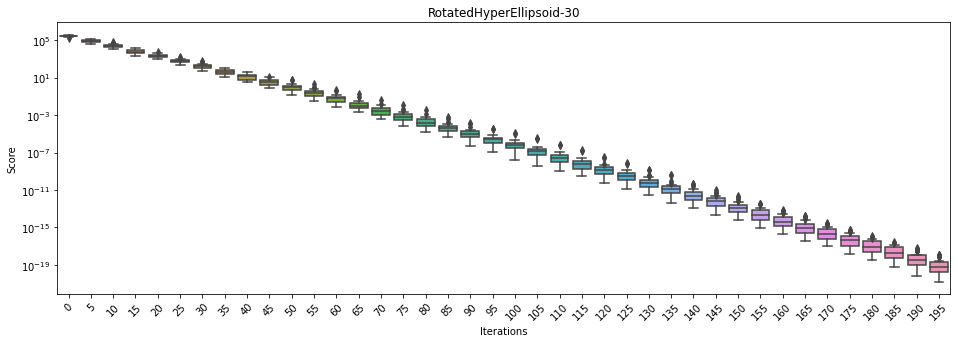

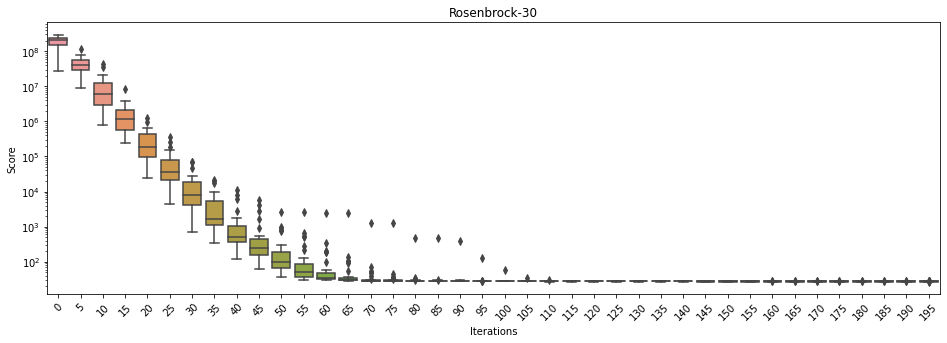

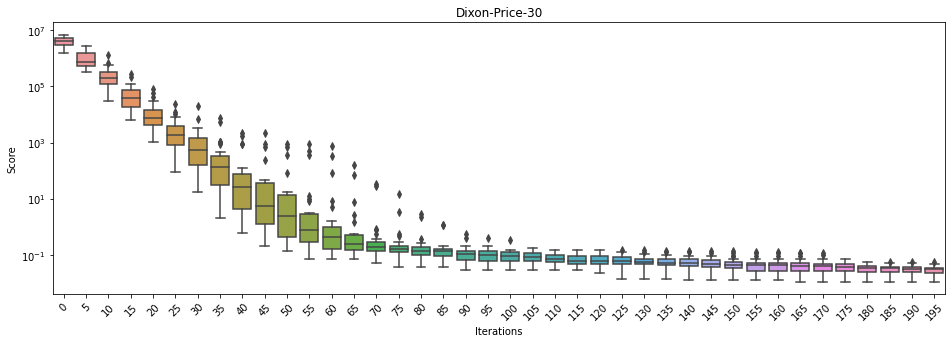

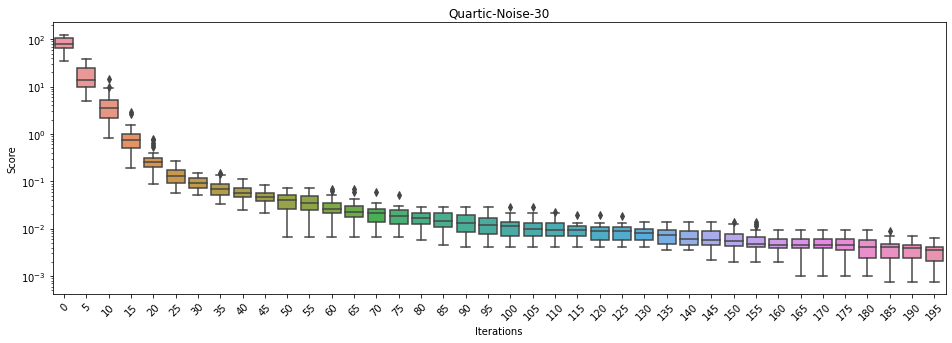

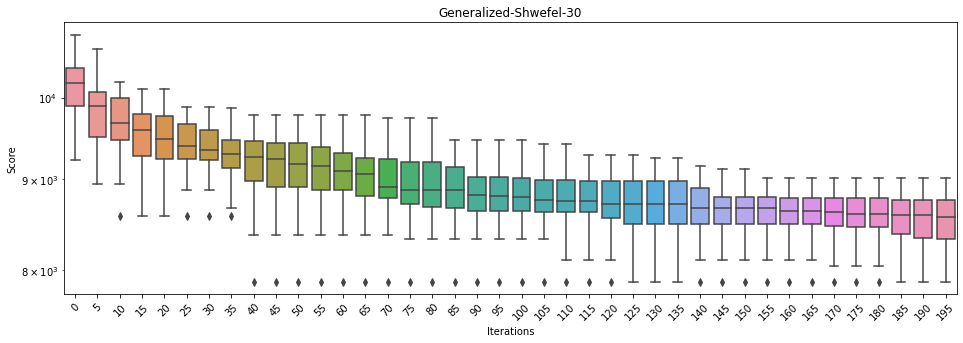

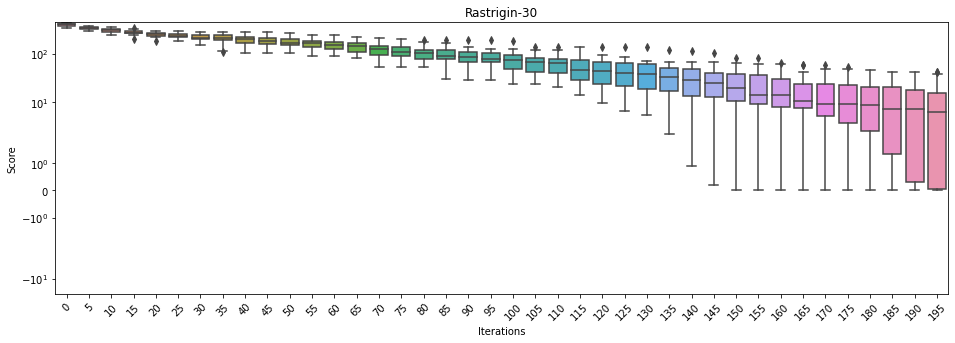

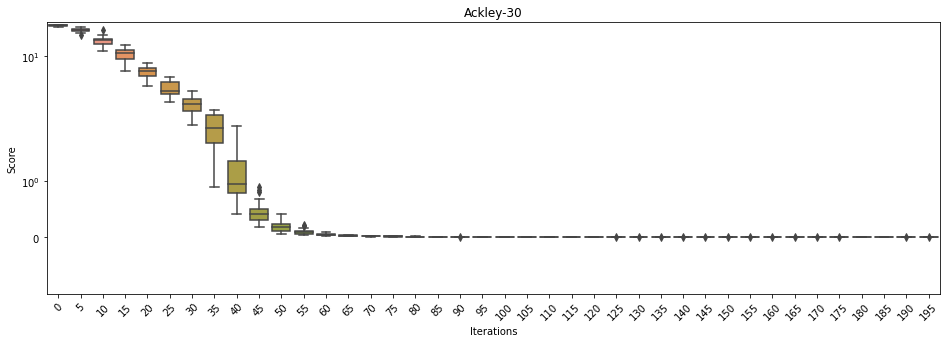

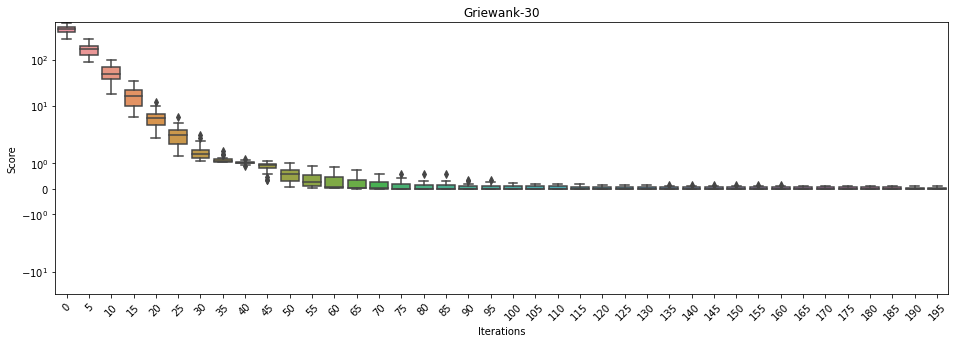

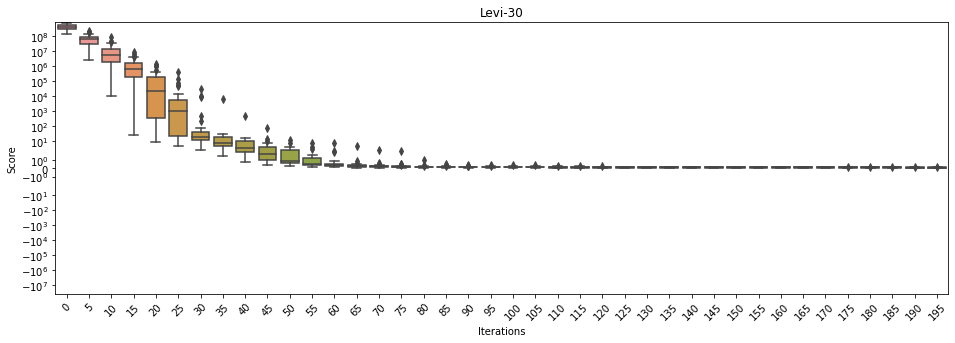

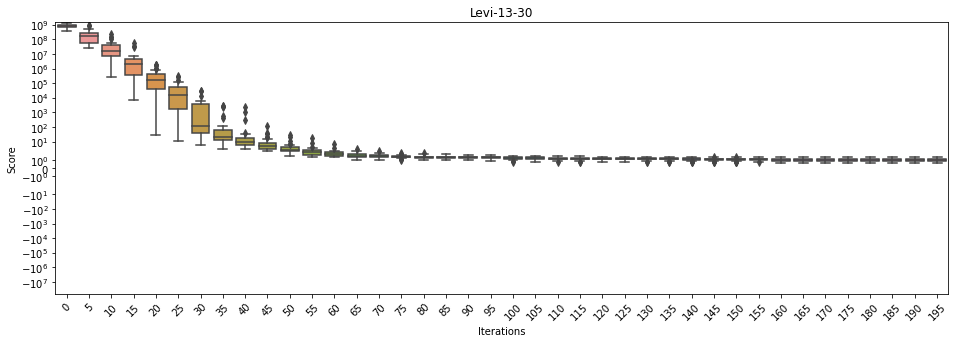

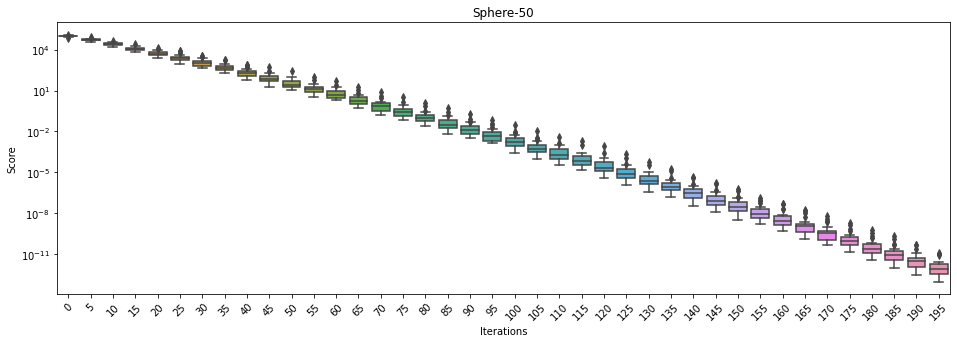

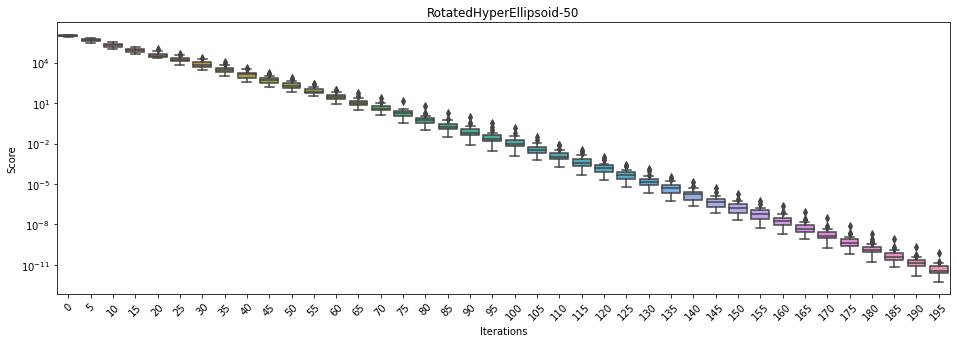

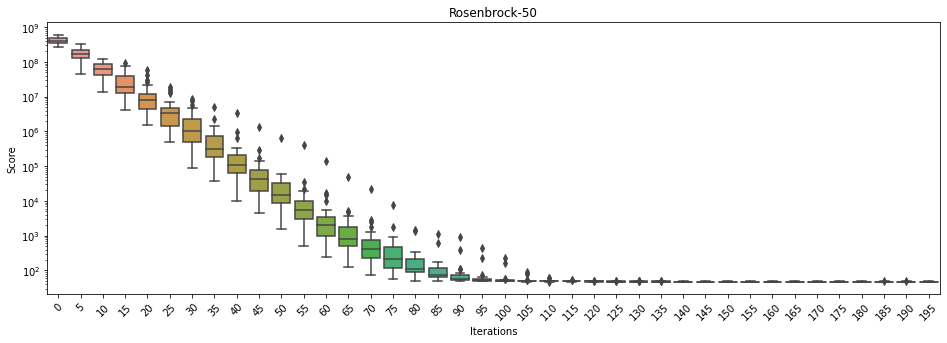

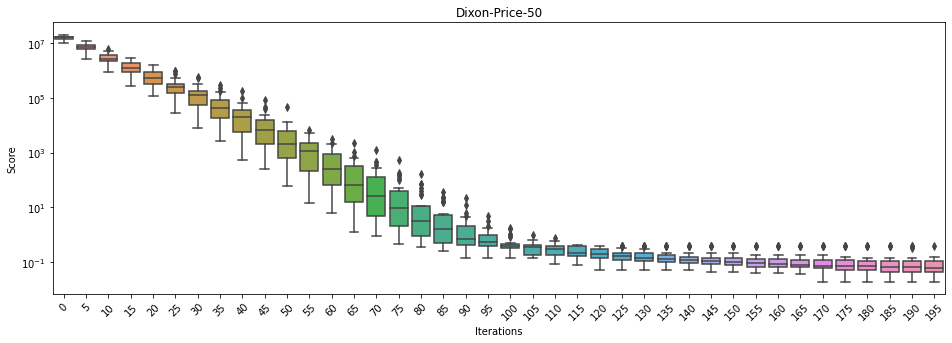

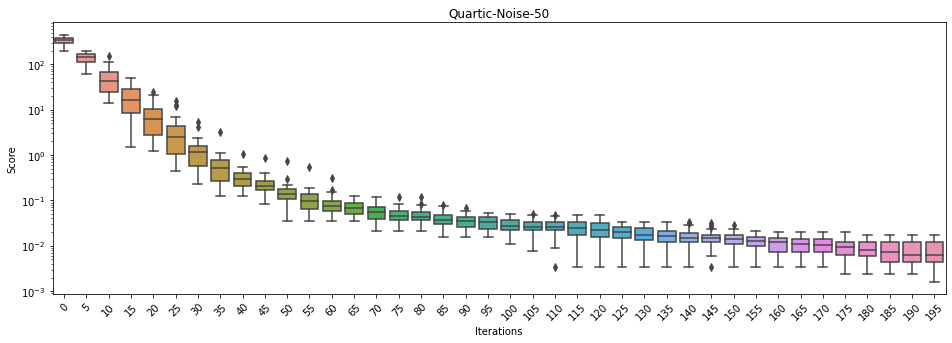

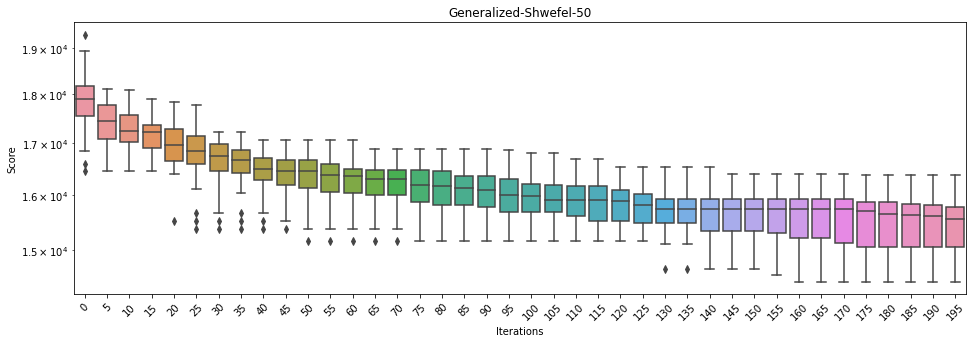

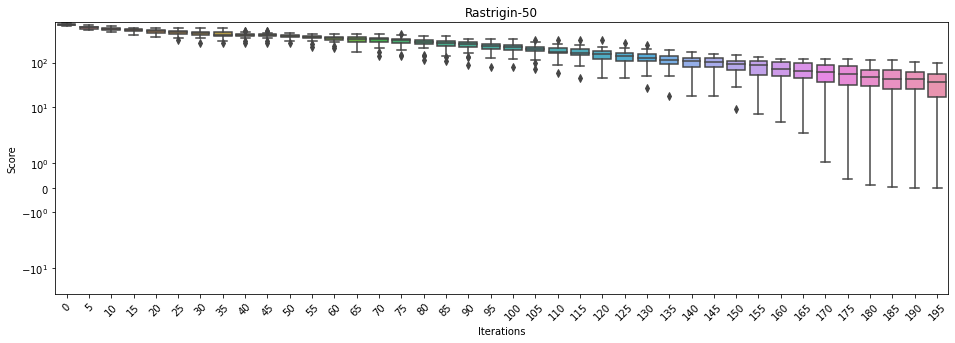

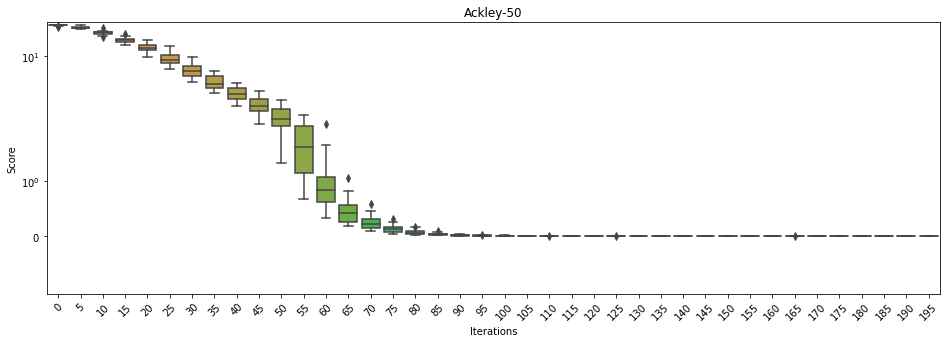

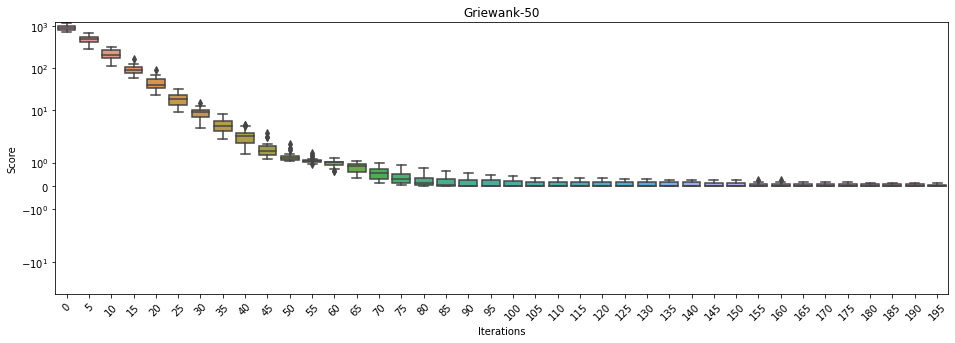

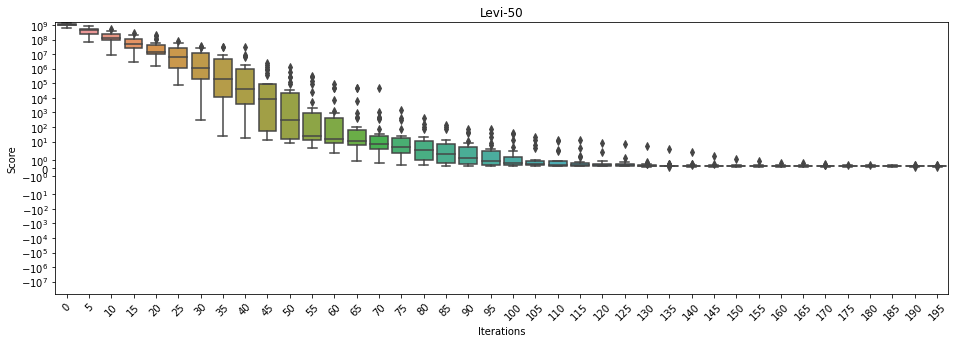

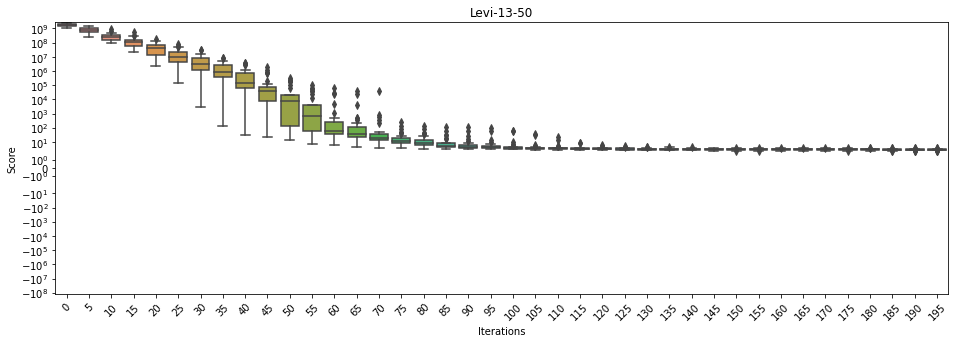

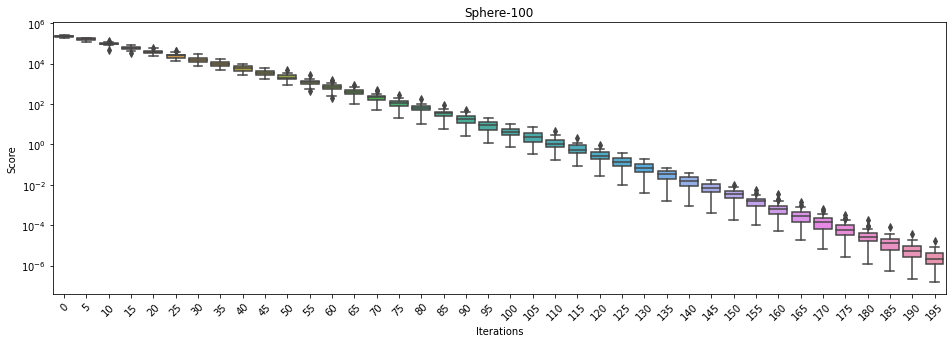

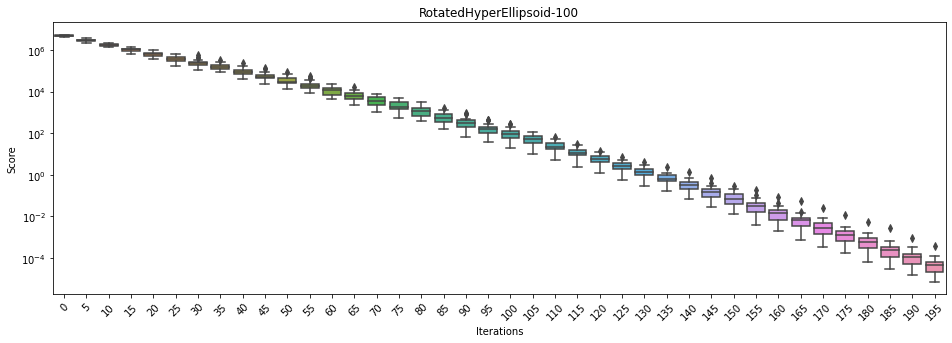

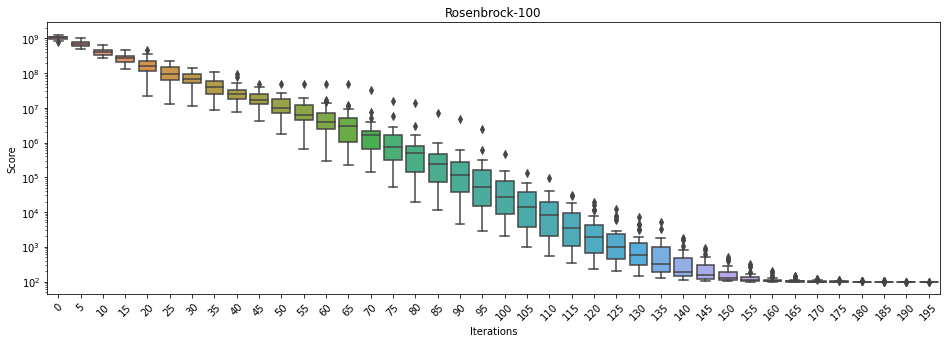

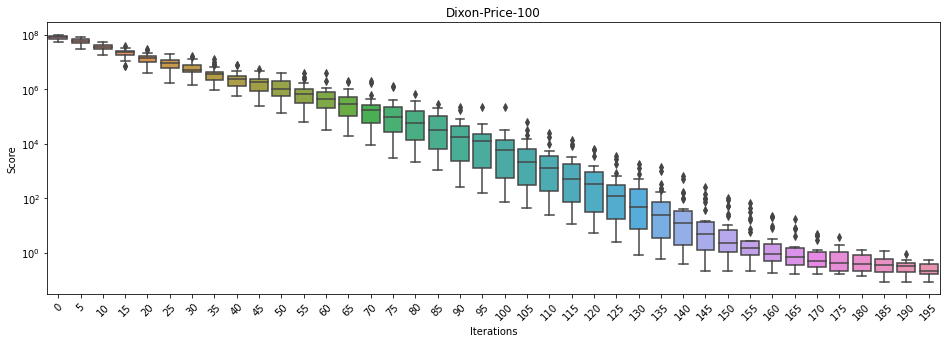

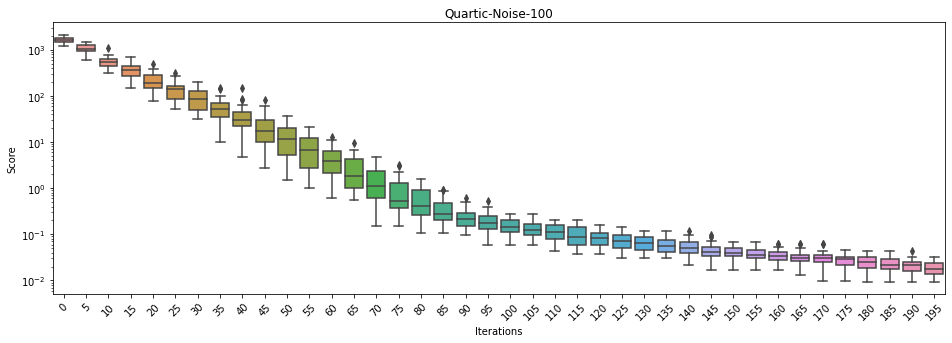

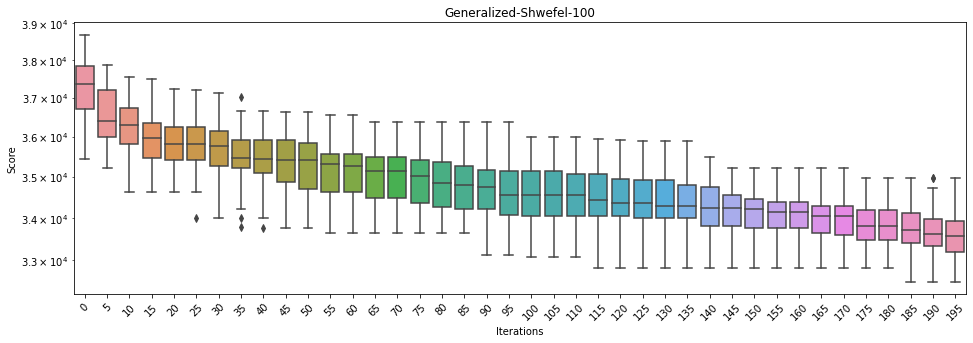

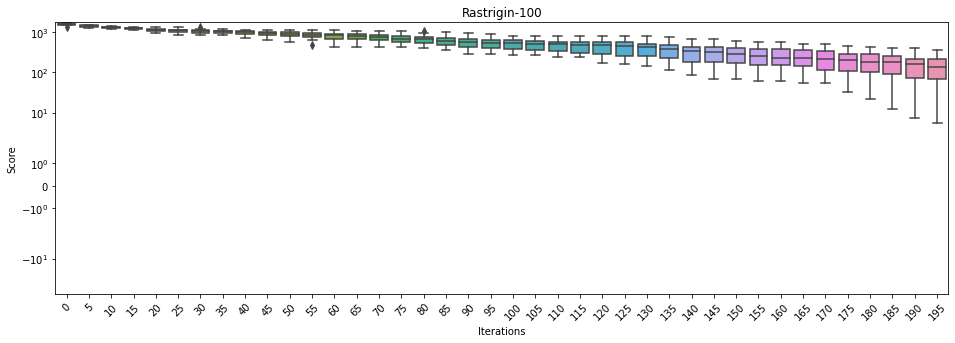

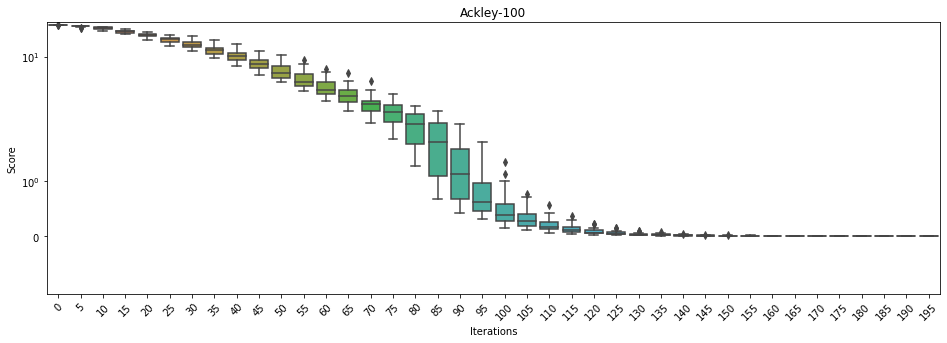

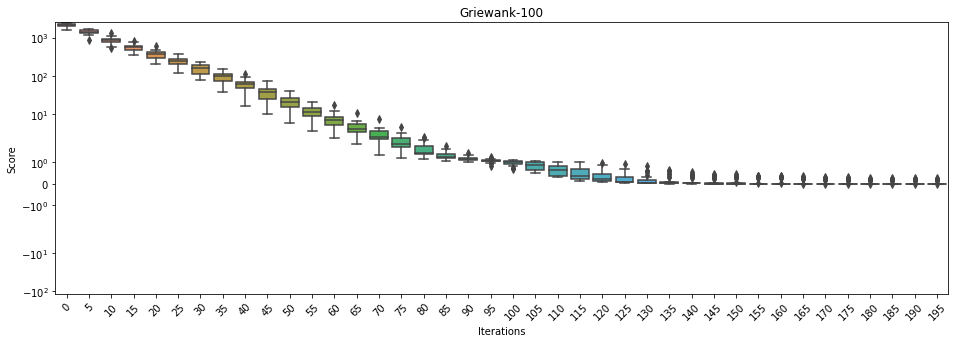

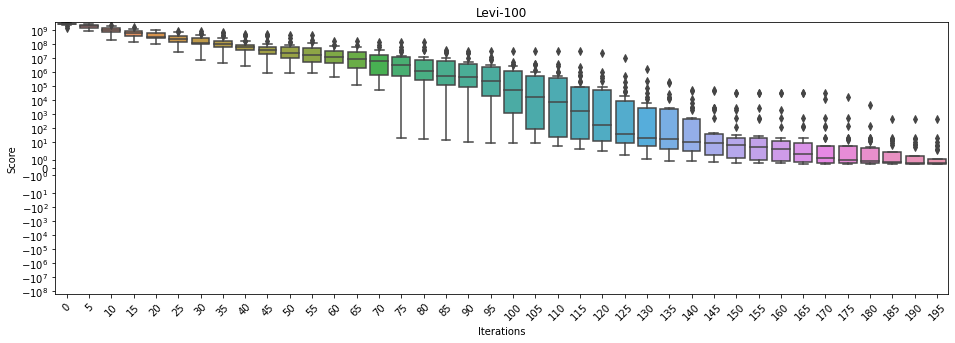

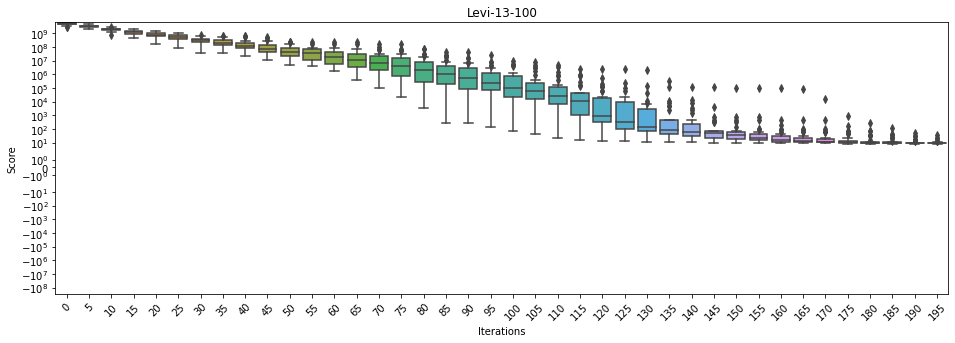

In [4]:
obj_show = []
plt.rcParams["figure.figsize"] = (16,5)
for d in dim:
  for f, func in enumerate(objective_functions):
    if func in ['Perm']:
      continue
    res = df_res[df_res['opt'] == 'VGWO']
    res = res[res['func'] == func]
    res = res[res['dim'] == d]
    res = res.drop(['opt', 'dim', 'func', 'num_i'], axis=1).to_numpy()
    
    y = []
    for i, line in enumerate(res):
      min_val = np.inf
      values = line[:200]
      for j, val in enumerate(values):
        if not j % 5:
          if val < min_val:
            min_val = val
          y.append([j, min_val])

    dt = pd.DataFrame(data=y, columns=['ite', 'score'])
    # res = pd.DataFrame(data=obj_show, index=range(len(obj_show)), columns=['func', 'score', 'dim'])
    ax = sns.boxplot(data=dt, y='score', x='ite')
    plt.yscale('symlog' if f > 6 else 'log')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set(xlabel='Iterations', ylabel='Score', title=f"{func}-{d}")
    plt.show()

Functions w/ 15 dim


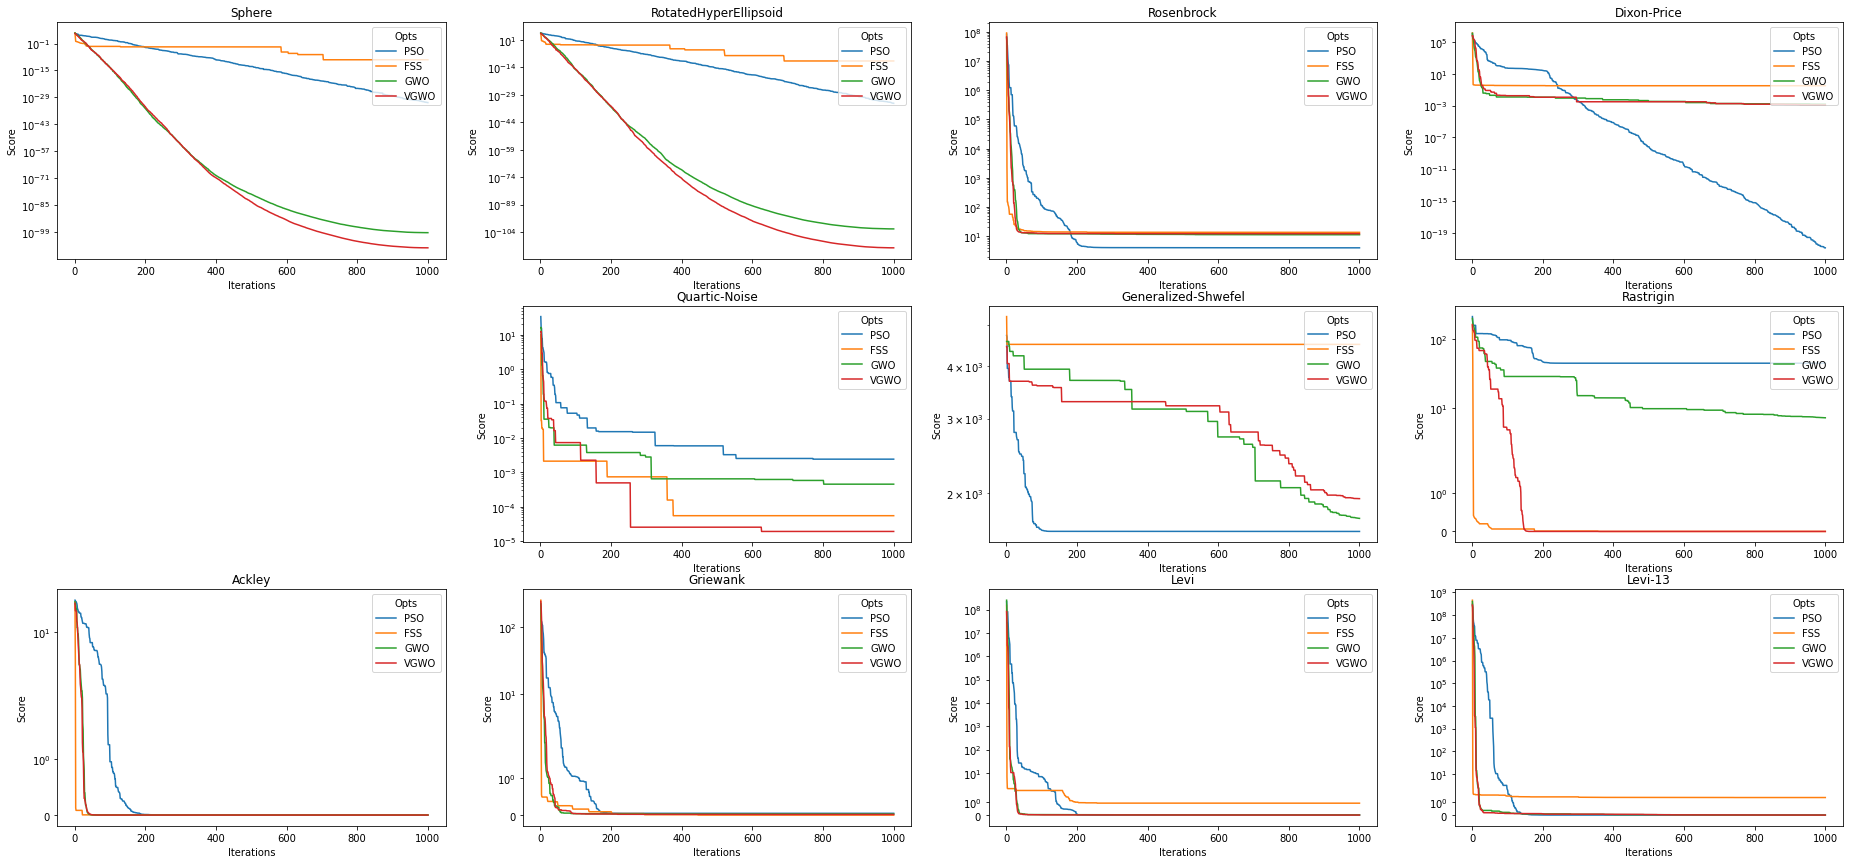

Functions w/ 30 dim


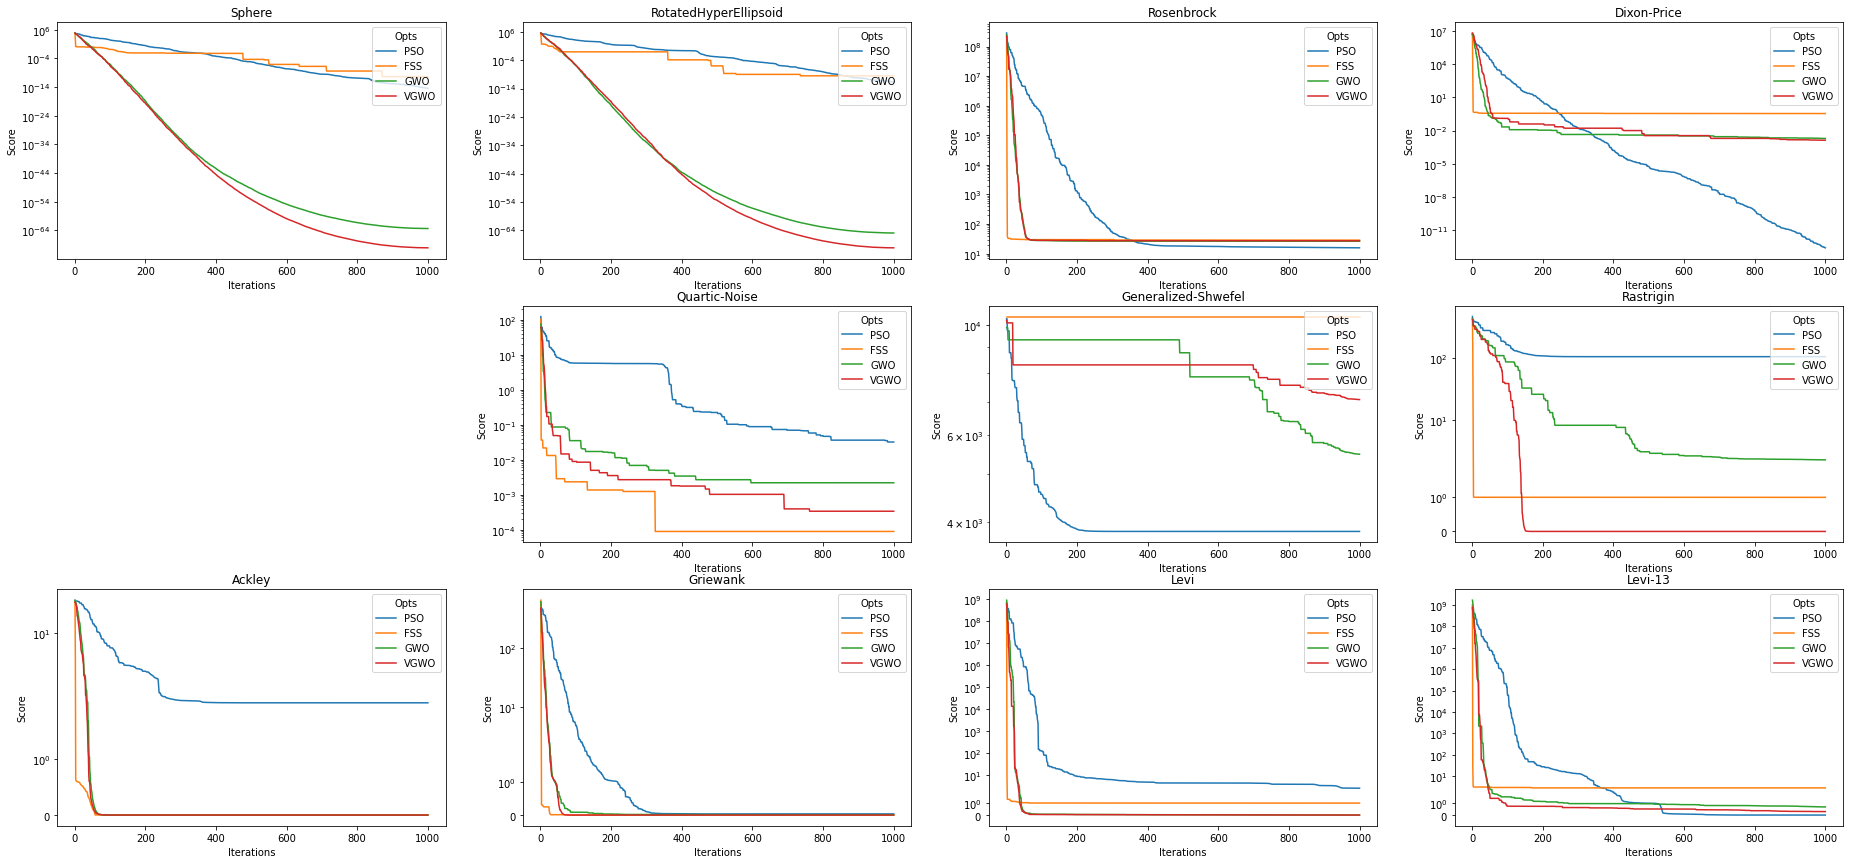

Functions w/ 50 dim


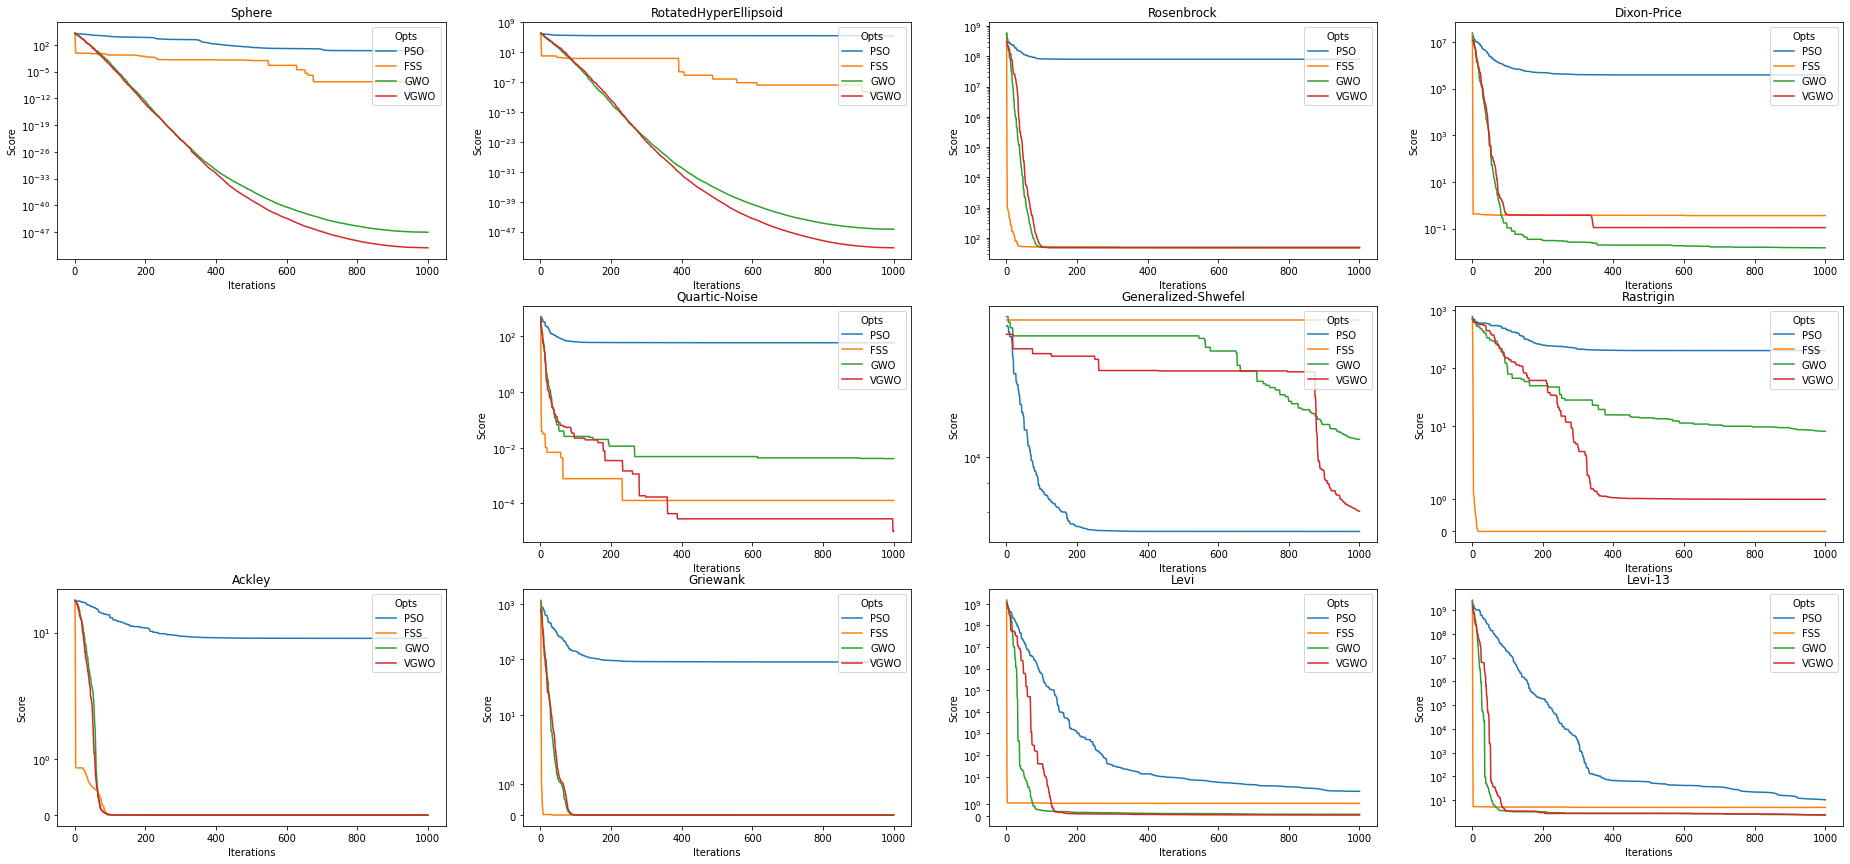

Functions w/ 100 dim


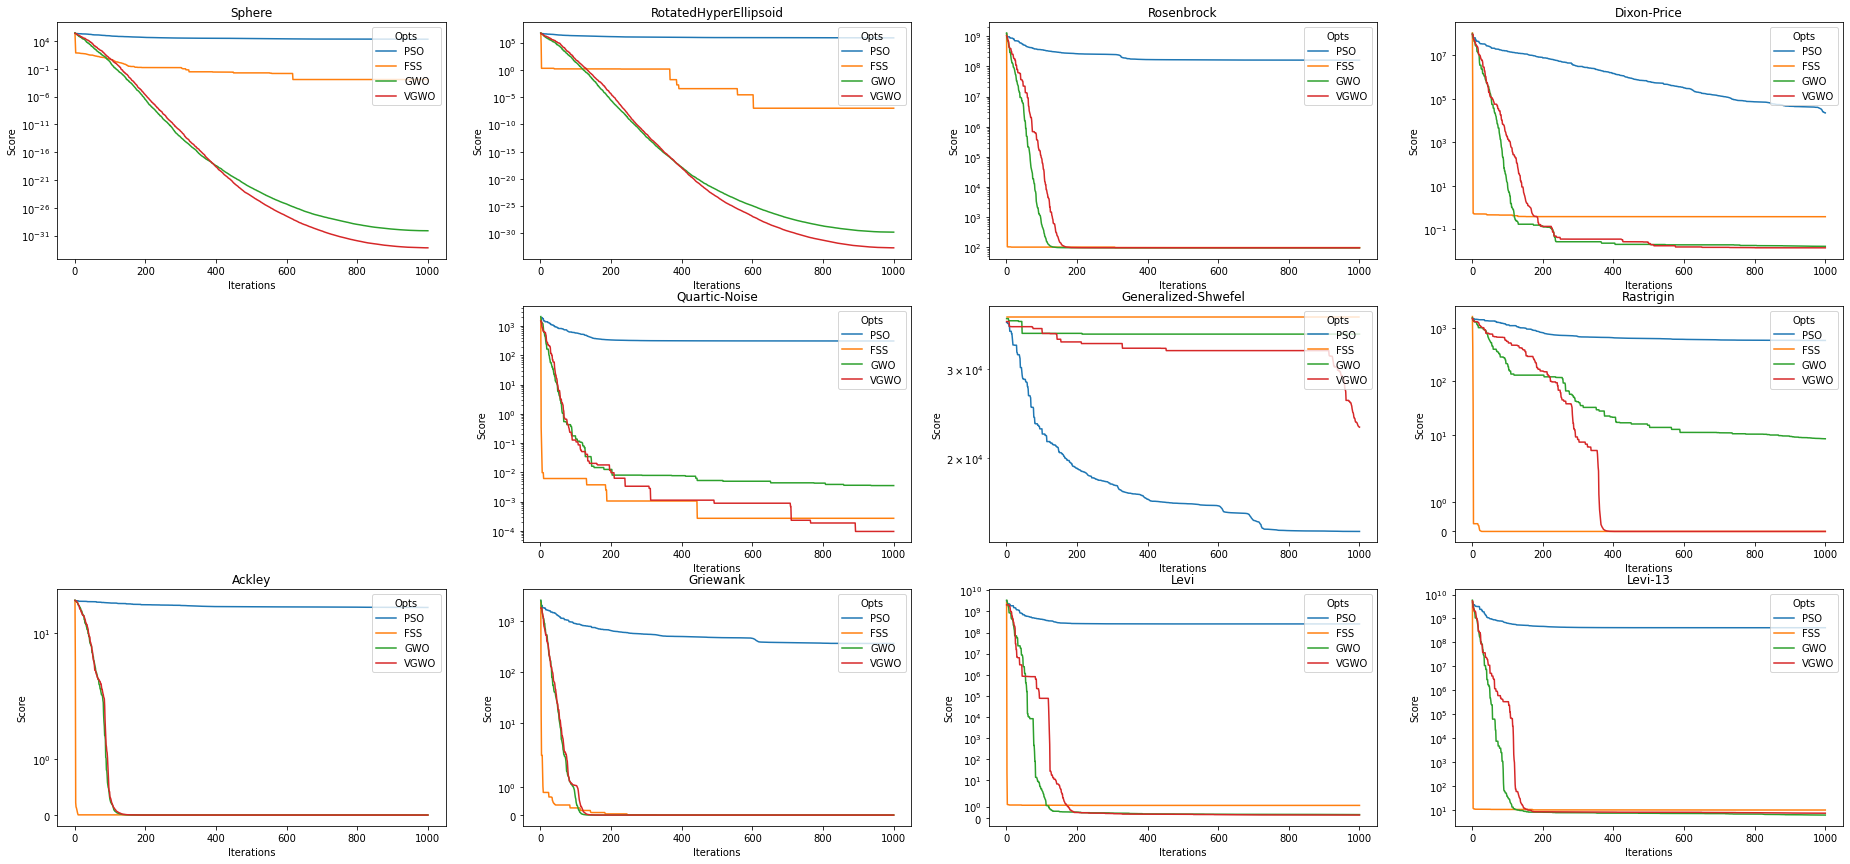

In [5]:
plt.rcParams["figure.figsize"] = (32,20)
for d in dim:
  print(f"Functions w/ {d} dim")
  for i, func in enumerate(objective_functions):
    if func in ['Perm']:
      continue
    plt.subplot(4, 4, i+1)
    for o in optimizers:
      res = df_res[df_res['opt'] == o]
      res = res[res['func'] == func]
      res = res[res['dim'] == d].head(1)
      res = res.drop(['opt', 'dim', 'func', 'num_i'], axis=1)
      scores = res.values.tolist()[0][:1000]
      min_y = np.inf
      new_y = []
      for v in scores:
        if v < min_y:
          min_y = v
        new_y.append(min_y)
      scores = new_y
      dt = pd.DataFrame(data=scores, index=range(1, len(scores)+1), columns=['score'])
      plt.plot(dt, label=o)
      plt.yscale('symlog' if i > 6 else 'log')
      plt.legend(loc='upper right', title='Opts')
    plt.title(func)
    plt.xlabel('Iterations')
    plt.ylabel('Score')
  plt.show()